Model: Logistic Regression
accuracy: 0.8211
precision: 0.6850
recall: 0.6005
f1_score: 0.6400
roc_auc: 0.7506


Model: Random Forest
accuracy: 0.7864
precision: 0.6324
recall: 0.4611
f1_score: 0.5333
roc_auc: 0.6823


Model: Gradient Boosting
accuracy: 0.8077
precision: 0.6747
recall: 0.5282
f1_score: 0.5925
roc_auc: 0.7182




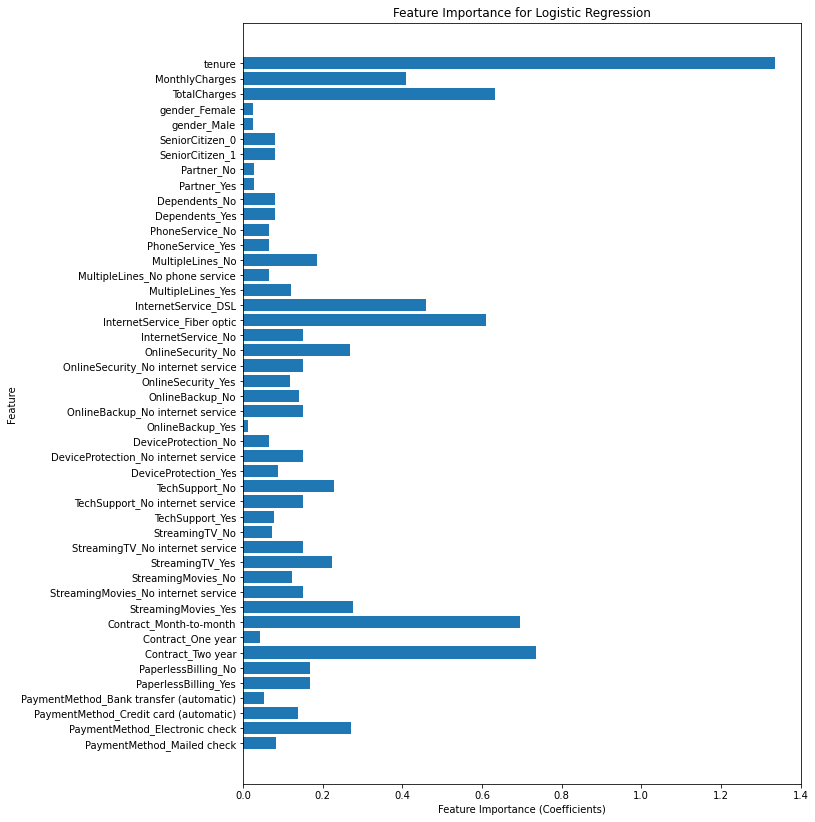

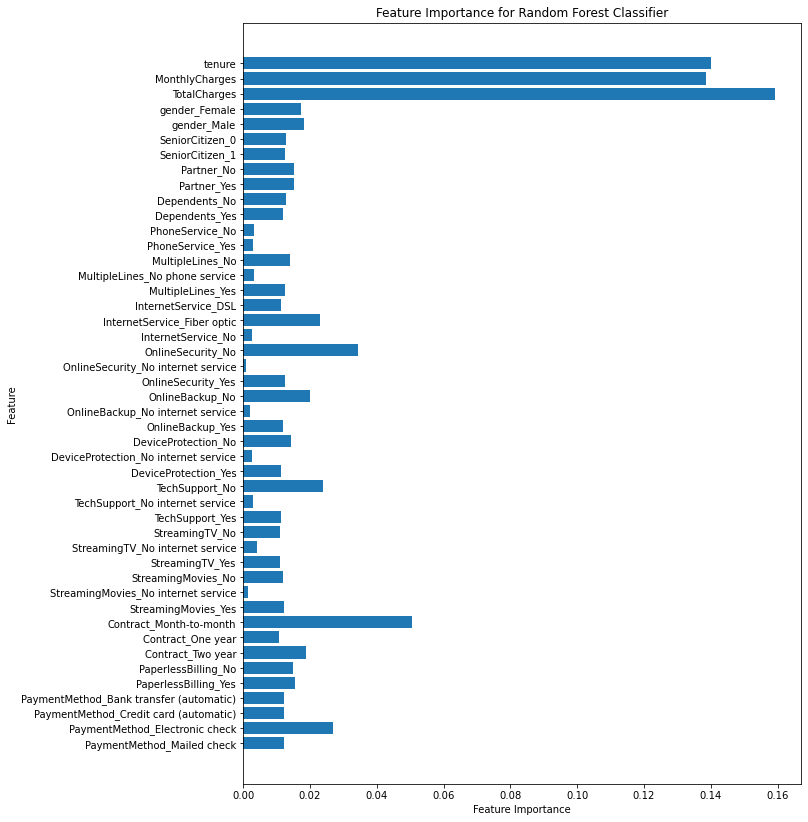

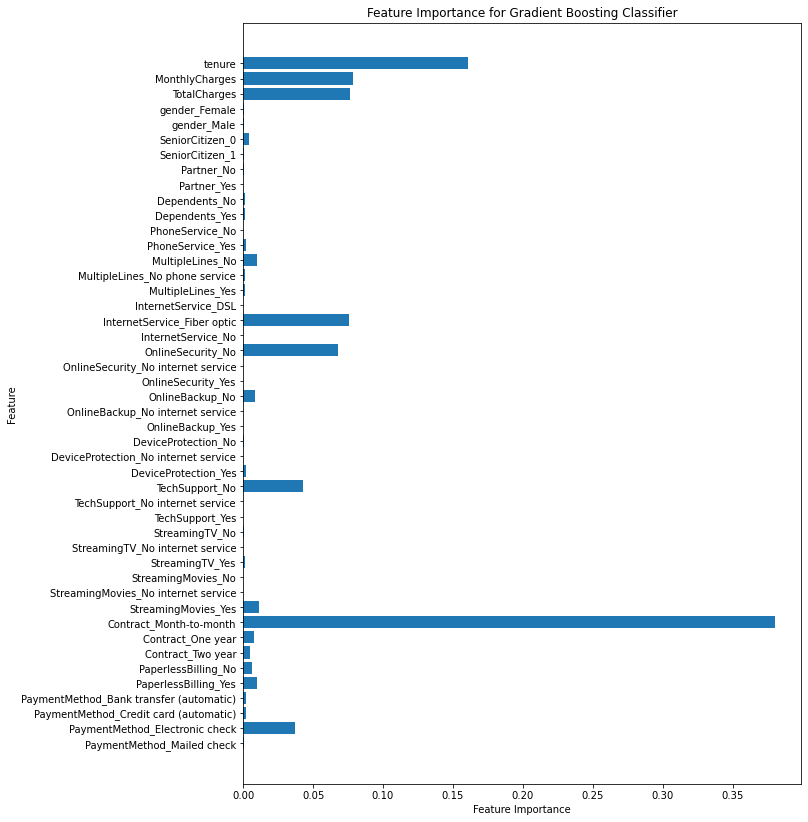

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Data exploration and cleaning
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Feature selection and preprocessing
features = df.drop(columns=['customerID', 'Churn'])
target = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define preprocessing steps
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = [col for col in features.columns if col not in numeric_features]
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define models
logreg = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', LogisticRegression(max_iter=1000))])

rf = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

gb = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', GradientBoostingClassifier(n_estimators=100, random_state=42))])

# Train and evaluate models
models = {'Logistic Regression': logreg, 'Random Forest': rf, 'Gradient Boosting': gb}
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc
    }

# Print results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")
    print("\n")

# Visualize feature importance for Logistic Regression
logreg_model = logreg.named_steps['classifier']
logreg_coefficients = np.abs(logreg_model.coef_[0])
logreg_feature_names = numeric_features + list(logreg.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features))

plt.figure(figsize=(10, 14))
plt.barh(logreg_feature_names, logreg_coefficients)
plt.xlabel("Feature Importance (Coefficients)")
plt.ylabel("Feature")
plt.title("Feature Importance for Logistic Regression")
plt.gca().invert_yaxis()
plt.show()

# Visualize feature importance for Random Forest
rf_model = rf.named_steps['classifier']
rf_importance = rf_model.feature_importances_
rf_feature_names = numeric_features + list(rf.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features))

plt.figure(figsize=(10, 14))
plt.barh(rf_feature_names, rf_importance)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for Random Forest Classifier")
plt.gca().invert_yaxis()
plt.show()

# Visualize feature importance for Gradient Boosting
gb_model = gb.named_steps['classifier']
gb_importance = gb_model.feature_importances_
gb_feature_names = numeric_features + list(gb.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features))

plt.figure(figsize=(10, 14))
plt.barh(gb_feature_names, gb_importance)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for Gradient Boosting Classifier")
plt.gca().invert_yaxis()
plt.show()


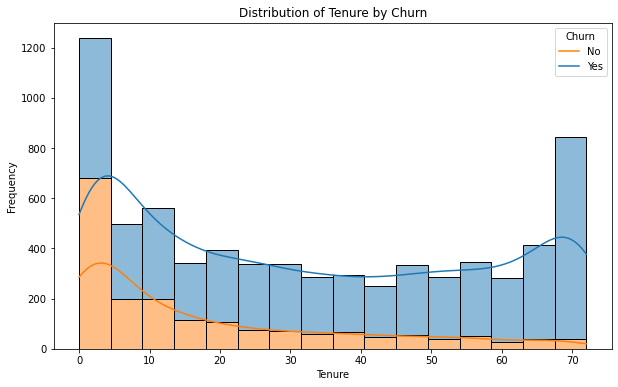

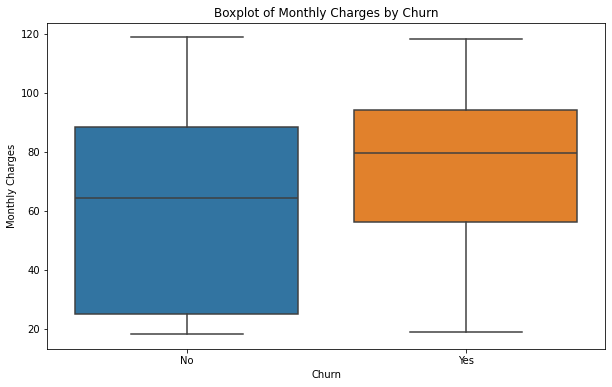

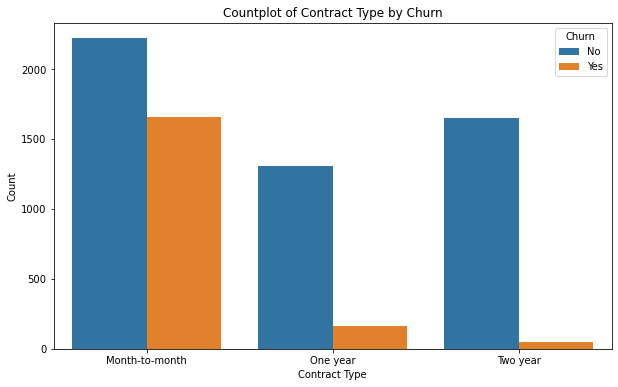

In [11]:


# Load the data
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')


# Convert the target variable to numeric
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Plot 1: Distribution of tenure by Churn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, multiple="stack")
plt.title('Distribution of Tenure by Churn')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.legend(title='Churn', labels=['No', 'Yes'])

# Plot 2: Boxplot of MonthlyCharges by Churn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Boxplot of Monthly Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.xticks([0, 1], ['No', 'Yes'])

# Plot 3: Countplot of Contract type by Churn
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Countplot of Contract Type by Churn')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
